In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Read CSV File in - original data available at https://datahub.transportation.gov/Roadways-and-Bridges/Motor-Vehicle-Registrations-by-vehicle-type-and-st/hwtm-7xmz
motor_total = pd.read_csv('data/Motor_Vehicle_Registrations.csv')
motor_cal = motor_total[motor_total['state']=='California'] # Specifically evaluate California data

In [3]:
# Clean data to be nationwide for motor_total and remove state column for motor_cal
motor_total = motor_total.groupby('year').sum(numeric_only=True)
motor_cal = motor_cal.drop('state', axis=1)

In [4]:
col_list = ['Auto', 'Bus', 'Truck', 'Motorcycle']
motor_total['Total'] = motor_total[col_list].sum(axis=1)
motor_total['Year'] = pd.Series(list(motor_total.index)).values
motor_cal['Total_Cal'] = motor_cal[col_list].sum(axis=1)
motor_cal = motor_cal.rename(columns={"year":"Year"})

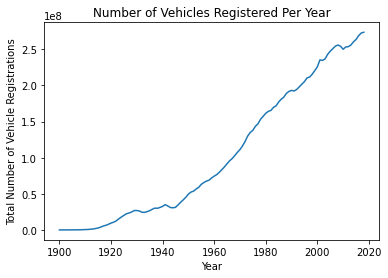

                                 OLS Regression Results                                
Dep. Variable:                  Total   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              160.9
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                    8.76e-24
Time:                        01:41:09   Log-Likelihood:                         -2348.1
No. Observations:                 119   AIC:                                      4698.
Df Residuals:                     118   BIC:                                      4701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:
# Plot and take linear regression statistics from total vehicles registered
fig1 = sns.lineplot(data=motor_total, x='year', y = 'Total')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicle Registrations')
plt.title('Number of Vehicles Registered Per Year')
plt.show()
print(sm.OLS(motor_total['Total'], motor_total['Year']).fit().summary())

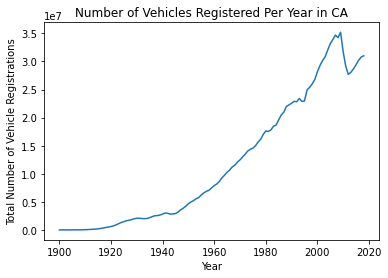

                                 OLS Regression Results                                
Dep. Variable:              Total_Cal   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.533
Method:                 Least Squares   F-statistic:                              136.8
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                    1.89e-21
Time:                        00:37:01   Log-Likelihood:                         -2099.4
No. Observations:                 119   AIC:                                      4201.
Df Residuals:                     118   BIC:                                      4204.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [6]:
# Plot and take linear regression statistics from total vehicles registered in California
fig2 = sns.lineplot(data=motor_cal, x='Year', y = 'Total_Cal')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicle Registrations')
plt.title('Number of Vehicles Registered Per Year in CA')
plt.show()
print(sm.OLS(motor_cal['Total_Cal'], motor_cal['Year']).fit().summary())

In [35]:
# Comparison betweeen state and national
motor_comp = [motor_total, motor_cal]
motor_comp = pd.concat(motor_comp, axis=1)
motor_comp = motor_comp.drop(['Auto', 'Bus', 'Truck', 'Motorcycle'], axis=1)
motor_comp["Data Year"] = motor_comp.iloc[:,2].fillna(0) + motor_comp.iloc[:,1].fillna(0)
motor_comp = motor_comp.drop(motor_comp.columns[[1, 2]],axis = 1)
motor_comp.groupby('Data Year')

In [74]:
reg_2016 = pd.read_csv('data/Vehicle Registration Counts by State_2016.csv')
reg_2017 = pd.read_csv('data/Vehicle Registration Counts by State_2017.csv')
reg_2018 = pd.read_csv('data/Vehicle Registration Counts by State_2018.csv')
reg_2019 = pd.read_csv('data/Vehicle Registration Counts by State_2019.csv')
reg_2020 = pd.read_csv('data/Vehicle Registration Counts by State_2020.csv')
reg_2021 = pd.read_csv('data/Vehicle Registration Counts by State_2021.csv')

all_sets = [reg_2016, reg_2017, reg_2018, reg_2019, reg_2020, reg_2021]

year = 2016
for df in all_sets:
    df['Year']=year
    year += 1
    
def standardize_number(string):
    string = string.replace(',', '')
    return int(string)

registrations = pd.concat(all_sets).reset_index(drop= True)
category_list = ['Electric (EV)','Plug-In Hybrid Electric (PHEV)','Hybrid Electric (HEV)','Biodiesel','Ethanol/Flex (E85)','Compressed Natural Gas (CNG)','Propane','Hydrogen','Methanol','Gasoline','Diesel']
for category in category_list:
    registrations[category] = registrations[category].astype(str)
    registrations[category] = registrations[category].apply(lambda x: x.replace(',', ''))
    registrations[category] = registrations[category].astype(int)

registrations["Total"] = registrations[category_list].sum(axis=1)
registrations['Percentage'] = registrations['Electric (EV)']/registrations["Total"]

cal_registrations = registrations[registrations["State"] == "California"]

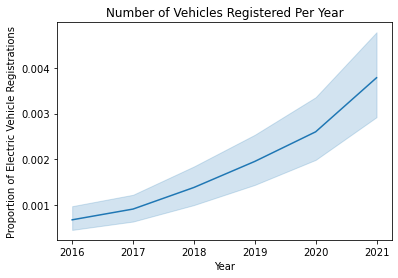

                                 OLS Regression Results                                
Dep. Variable:             Percentage   R-squared (uncentered):                   0.400
Model:                            OLS   Adj. R-squared (uncentered):              0.399
Method:                 Least Squares   F-statistic:                              207.7
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                    2.01e-36
Time:                        01:36:08   Log-Likelihood:                          1451.4
No. Observations:                 312   AIC:                                     -2901.
Df Residuals:                     311   BIC:                                     -2897.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [81]:
# Plot and take linear regression statistics from pecentage of EV's
fig3 = sns.lineplot(data=registrations, x='Year', y = 'Percentage')
plt.xlabel('Year')
plt.ylabel('Proportion of Electric Vehicle Registrations')
plt.title('Number of Vehicles Registered Per Year')
plt.show()
print(sm.OLS(registrations['Percentage'], registrations['Year']).fit().summary())

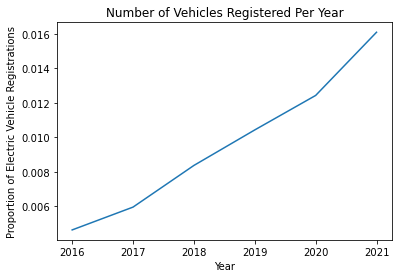

                                 OLS Regression Results                                
Dep. Variable:             Percentage   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              31.05
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                     0.00256
Time:                        01:38:01   Log-Likelihood:                          24.808
No. Observations:                   6   AIC:                                     -47.62
Df Residuals:                       5   BIC:                                     -47.82
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [83]:
# Plot and take linear regression statistics from pecentage of EV's in California
fig4 = sns.lineplot(data=cal_registrations, x='Year', y = 'Percentage')
plt.xlabel('Year')
plt.ylabel('Proportion of Electric Vehicle Registrations')
plt.title('Number of Vehicles Registered Per Year')
plt.show()
print(sm.OLS(cal_registrations['Percentage'], cal_registrations['Year']).fit().summary())